In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings 
from itertools import cycle
import matplotlib.colors as clr
warnings.filterwarnings('ignore')
%matplotlib inline 
%config InlineBackend.figure_format='retina'

## Фрактал Мандельброта

In [5]:
def mandelbrot(pmin, pmax, ppoints, qmin, qmax, qpoints, 
               max_iterations=200, infinity_border=10):
    image = np.zeros((ppoints, qpoints))
    p, q = np.mgrid[pmin:pmax:(ppoints*1j), qmin:qmax:(qpoints*1j)]
    c = p + 1j*q
    z = np.zeros_like(c)
    for k in range(max_iterations):
        z = z**2 + c
        mask = (np.abs(z) > infinity_border) & (image == 0)
        image[mask] = k
        z[mask] = np.nan
    return -image.T

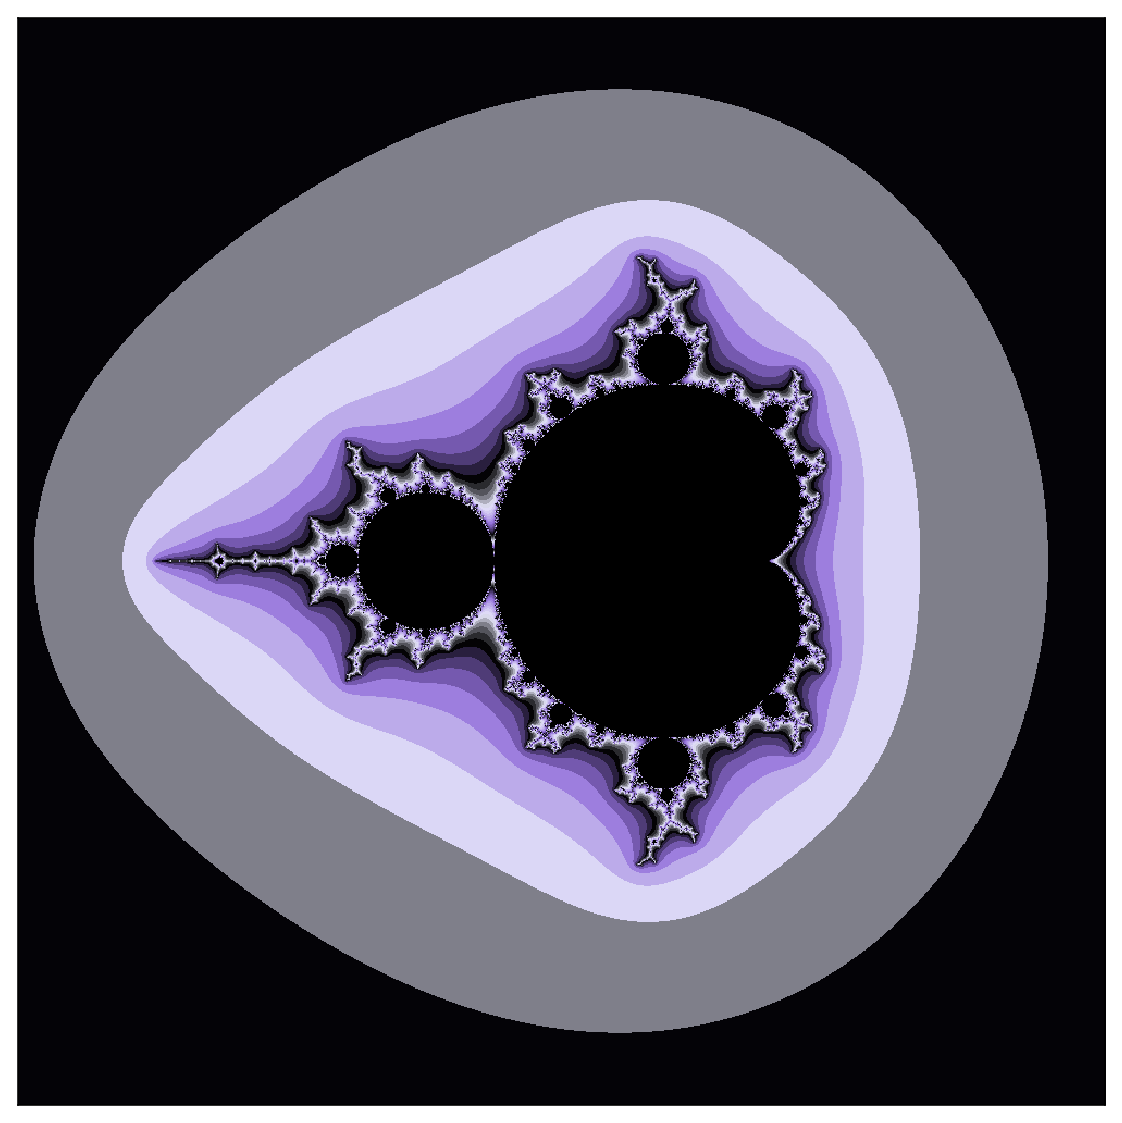

In [6]:
image = mandelbrot(-2.5, 1.5, 1000, -2, 2, 1000)
colorpoints = [(1-(1-q)**4, c) for q, c in zip(np.linspace(0, 1, 20), 
                                               cycle(['#e6e6fa', '#000000', 
                                                      '#9370db',]))]
cmap = clr.LinearSegmentedColormap.from_list('mycmap', 
                                             colorpoints, N=2048)

plt.figure(figsize=(10, 10))
plt.xticks([])
plt.yticks([])
plt.imshow(image, cmap=cmap, interpolation='none')

## Фрактал Жюліа

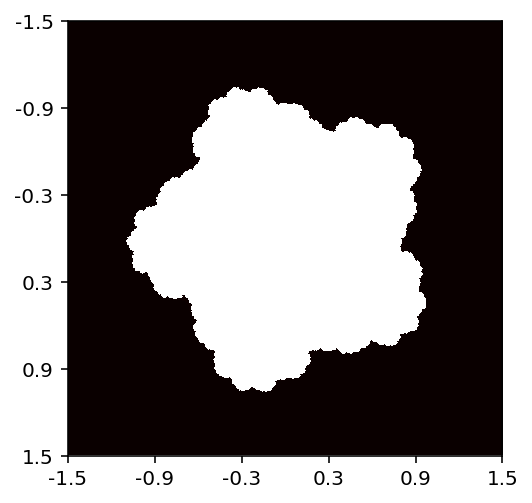

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Image width and height; parameters for the plot
im_width, im_height = 500, 500
c = complex(-0.11, 0.51)
zabs_max = 10
nit_max = 1000
xmin, xmax = -1.5, 1.5
xwidth = xmax - xmin
ymin, ymax = -1.5, 1.5
yheight = ymax - ymin

julia = np.zeros((im_width, im_height))
for ix in range(im_width):
    for iy in range(im_height):
        nit = 0
        # Map pixel position to a point in the complex plane
        z = complex(ix / im_width * xwidth + xmin,
                    iy / im_height * yheight + ymin)
        # Do the iterations
        while abs(z) <= zabs_max and nit < nit_max:
            z = z**5 + c
            nit += 1
        shade = 1-np.sqrt(nit / nit_max)
        ratio = nit / nit_max
        julia[ix,iy] = ratio

fig, ax = plt.subplots()
ax.imshow(julia, interpolation='nearest', cmap=cm.hot)
# Set the tick labels to the coordinates of z0 in the complex plane
xtick_labels = np.linspace(xmin, xmax, xwidth / 0.5)
ax.set_xticks([(x-xmin) / xwidth * im_width for x in xtick_labels])
ax.set_xticklabels(['{:.1f}'.format(xtick) for xtick in xtick_labels])
ytick_labels = np.linspace(ymin, ymax, yheight / 0.5)
ax.set_yticks([(y-ymin) / yheight * im_height for y in ytick_labels])
ax.set_yticklabels(['{:.1f}'.format(ytick) for ytick in ytick_labels])
plt.show()